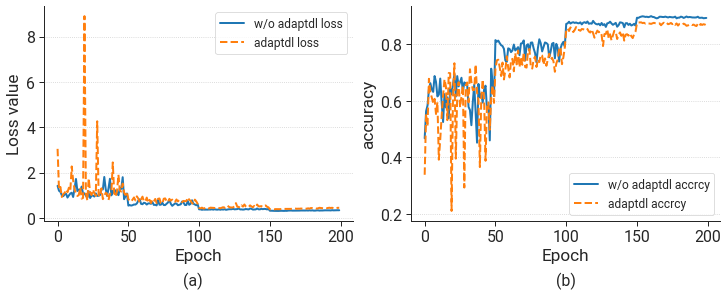

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("ticks")
font = {
    "font.family": "Roboto",
    "font.size": 12,
}
sns.set_style(font)
paper_rc = {
    "lines.linewidth": 3,
    "lines.markersize": 10,
}
sns.set_context("paper", font_scale=1.8, rc=paper_rc)
current_palette = sns.color_palette()
cmp = sns.color_palette("tab10")

SAVEPATH = '.'
cmp = sns.color_palette("tab10")

def trace_analysis(save=False):
    grid_params=dict(width_ratios=[1, 1])
    fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, gridspec_kw=grid_params, constrained_layout=True, figsize=(10, 4))

    df1 = pd.read_csv('./EfficientNetB0/false.csv')
    df2 = pd.read_csv('./EfficientNetB0/true.csv')

    false_loss = df1.loc[:, ['Loss/Valid']].dropna()
    true_loss = df2.loc[:, ['Loss/Valid']].dropna()
    false_accuracy = df1.loc[:, ['Accuracy/Valid']].dropna()
    true_accuracy = df2.loc[:, ['Accuracy/Valid']].dropna()
    
    x = np.arange(df1.shape[0])
    # print(false_loss['Loss/Valid'])
    ax1.plot(x, false_loss['Loss/Valid'], label='w/o adaptdl loss', linewidth=2, color=cmp[0])
    ax1.plot(x, true_loss['Loss/Valid'], label='adaptdl loss', linewidth=2, linestyle='--', color=cmp[1])
    
    ax1.set_xlabel(f"Epoch")
    ax1.set_ylabel(f"Loss value")
    ax1.grid(axis="y", linestyle=":")
    ax1.legend(loc=0, fontsize=12)
    sns.despine()

    ax2.plot(x, false_accuracy['Accuracy/Valid'], label='w/o adaptdl accrcy', linewidth=2)
    ax2.plot(x, true_accuracy['Accuracy/Valid'], label='adaptdl accrcy', linewidth=2, linestyle='--')

    ax2.set_xlabel(f"Epoch")
    ax2.set_ylabel(f"accuracy")
    ax2.grid(axis="y", linestyle=":")
    ax2.legend(loc=4, fontsize=12)
    sns.despine()

    ax1.text(0.45, -0.3, "(a)", transform=ax1.transAxes, size=16)
    ax2.text(0.47, -0.3, "(b)", transform=ax2.transAxes, size=16)

    if save:
        fig.savefig(f"{SAVEPATH}/trace_analysis.pdf", bbox_inches="tight")


trace_analysis(save=False)